In [1]:
import pandas as pd

filename = "./JA010034.tsv_all"

In [2]:
columns = """
1. longitude 
2. latitude 
3. depth 
4. sigh 
5. sigd 
6. SID 
7. predicted_depth 
8. ID 
9. d10 
10. d20 
11. d60 
12. seafloor_age 
13. curvature(VGG)
14. spreading_rate 
15. sediment_thickness 
16. seafloor_roughness 
17. NDP_@2.5am 
18. NDP_@5am 
19. NDP_@10am 
20. NDP_@30am 
21. STD_@2.5am 
22. STD_@5am 
23. STD_@10am 
24. STD_@30am 
25. depth_SUB_median@2.5am 
26. depth_SUB_median@5am 
27. depth_SUB_median@10am 
28. depth_SUB_median@30am 
29. year 
30. data_type
"""

columns = list(map(lambda s: s.strip(), columns.strip().split('\n')))
len(columns), columns

(30,
 ['1. longitude',
  '2. latitude',
  '3. depth',
  '4. sigh',
  '5. sigd',
  '6. SID',
  '7. predicted_depth',
  '8. ID',
  '9. d10',
  '10. d20',
  '11. d60',
  '12. seafloor_age',
  '13. curvature(VGG)',
  '14. spreading_rate',
  '15. sediment_thickness',
  '16. seafloor_roughness',
  '17. NDP_@2.5am',
  '18. NDP_@5am',
  '19. NDP_@10am',
  '20. NDP_@30am',
  '21. STD_@2.5am',
  '22. STD_@5am',
  '23. STD_@10am',
  '24. STD_@30am',
  '25. depth_SUB_median@2.5am',
  '26. depth_SUB_median@5am',
  '27. depth_SUB_median@10am',
  '28. depth_SUB_median@30am',
  '29. year',
  '30. data_type'])

In [18]:
a.replace("\r", " ")

'152.60033 -32.9055 -232 0 -1 53907 -182 7365333 0.872117544955 0.744367905217 38.9718051078\t115.743731853\tNaN 1206.46836276\t1213.37891444\t0.927156057673\t0.899536608311 S  1994\t107.597722099 339.894349961 1256.61916819 10085.1243587 25.472604384 69.7379391992 151.622553893 801.596660915 -173.942942307 -197.604625974 -192.136682302 -573.228401822 -2.2792 -0.493209 -0.262912 0.425686\n'

In [28]:
import io

with io.open(filename, 'r', newline='\n') as f:
    data = [line.replace('\r', ' ') for line in f.readlines()]

df = pd.read_csv(io.StringIO('\n'.join(data)), sep='\s+', names=columns + ["a", "b", "c", "d", "e"])
print(df.shape)
df.head()

(5744, 35)


,1. longitude,2. latitude,3. depth,4. sigh,5. sigd,6. SID,7. predicted_depth,8. ID,9. d10,10. d20,...,26. depth_SUB_median@5am,27. depth_SUB_median@10am,28. depth_SUB_median@30am,29. year,30. data_type,a,b,c,d,e
0,152.60033,-32.90550,-232,0,-1,53907,-182,7365333,0.872118,0.744368,...,151.622554,801.596661,-173.942942,-197.604626,-192.136682,-573.228402,-2.27920,-0.493209,-0.262912,0.425686
1,152.60316,-32.90366,-248,0,-1,53907,-197,7365393,0.870268,0.746211,...,152.435614,802.789978,-176.757270,-198.969020,-195.956942,-571.112538,-2.74773,-0.700302,-0.341410,0.402487
2,152.60883,-32.89983,-255,0,-1,53907,-179,7365453,0.865242,0.749746,...,153.946170,804.811512,-181.444513,-201.477486,-203.706510,-565.971673,-2.72983,-0.765905,-0.333191,0.386391
3,152.61316,-32.89700,-263,0,-1,53907,-174,7365513,0.862076,0.752733,...,155.239769,806.437691,-183.509719,-203.880377,-210.058990,-562.389898,-2.83643,-0.848736,-0.341027,0.371250
4,152.61716,-32.89416,-270,0,-1,53907,-190,7365573,0.858505,0.755102,...,156.238514,807.451131,-184.127147,-206.020049,-215.653354,-557.827854,-2.95069,-0.926868,-0.347844,0.356465


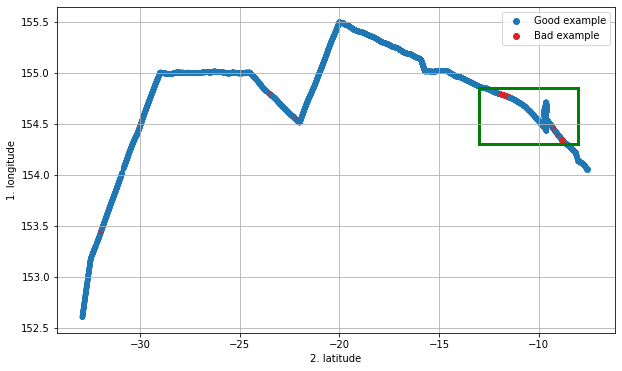

In [32]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# df.plot(x="1. longitude", y="5. sigd", ax=)
color = df["5. sigd"]
color_chr = []
for i, c in enumerate(list(color)):
    if c == 9999:
        color_chr.append('#d62728')
        bad_point = list(df.loc[i, :])[0], list(df.loc[i, :])[1]
    else:
        color_chr.append('#1f77b4')
        good_point = list(df.loc[i, :])[0], list(df.loc[i, :])[1]
df.plot.scatter(x="2. latitude", y="1. longitude", c=color_chr, ax=ax)
ax.scatter([good_point[1]], [good_point[0]], c="#1f77b4", label="Good example")
ax.scatter([bad_point[1]], [bad_point[0]], c="#d62728", label="Bad example")
ax.legend();

rect = patches.Rectangle((-13, 154.3), 5, 0.55, linewidth=3, edgecolor='green', facecolor='none')
ax.add_patch(rect)

ax.grid();

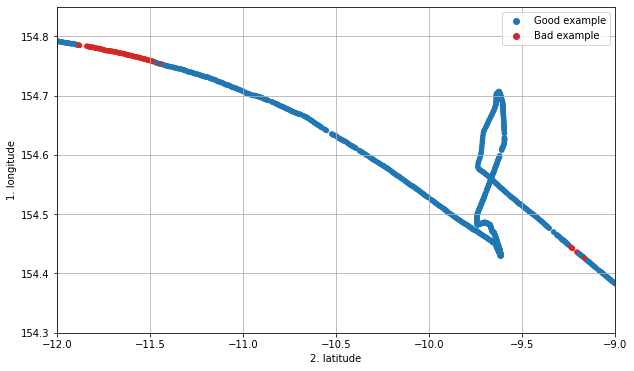

In [34]:
%matplotlib inline
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# df.plot(x="1. longitude", y="5. sigd", ax=)
color = df["5. sigd"]
color_chr = []
for c in list(color):
    if c == 9999:
        color_chr.append('#d62728')
    else:
        color_chr.append('#1f77b4')
df.plot.scatter(x="2. latitude", y="1. longitude", c=color_chr, ax=ax)
ax.scatter([good_point[1]], [good_point[0]], c="#1f77b4", label="Good example")
ax.scatter([bad_point[1]], [bad_point[0]], c="#d62728", label="Bad example")
ax.legend();

ax.set_xlim([-12, -9])
ax.set_ylim([154.3, 154.85])
ax.grid();

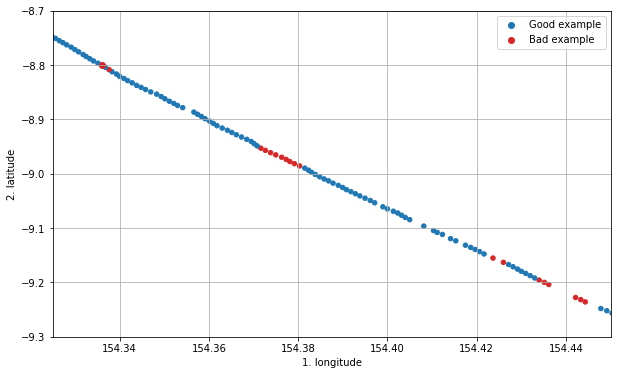

In [27]:
%matplotlib inline
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# df.plot(x="1. longitude", y="5. sigd", ax=)
color = df["5. sigd"]
color_chr = []
for c in list(color):
    if c == 9999:
        color_chr.append('#d62728')
    else:
        color_chr.append('#1f77b4')
df.plot.scatter(y="2. latitude", x="1. longitude", c=color_chr, ax=ax)
ax.scatter([good_point[0]], [good_point[1]], c="#1f77b4", label="Good example")
ax.scatter([bad_point[0]], [bad_point[1]], c="#d62728", label="Bad example")
ax.legend();

ax.set_ylim([-9.3, -8.7])
ax.set_xlim([154.325, 154.45])
ax.grid();